In [1]:
import sys
import os
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
sys.path.insert(0, str(root_dir))

import spatialzoomer as sz
import numpy as np
import pandas as pd
import scanpy as sc

import warnings
warnings.filterwarnings("ignore")

C:\Users\fyh\AppData\Roaming\Python\Python39\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


## read h5ad data processed by SpatialZoomer

In [2]:
dataset = "XeniumLungCancer"
ad = sc.read_h5ad("E:/SZ/Results/" + dataset + "/" + dataset + "_GWT_anndata.h5ad")

# assign cell type to each cluster
if dataset == 'XeniumLungCancer':
    ad.obs['leiden_Raw_res1_origin'] = ad.obs['leiden_Raw_res1'].copy()
    print(np.unique(ad.obs['leiden_Raw_res1']))
    new_cluster_names = [
        "AT2_CYP2B6", # 0 
        "Basal Epithelial", #  1 Basal Epithelial
        "T",# 2 MS4A4A, MS4A6A
        "AT2_SFTA2",# 3 GPRC5A, EPCAM, MALL, GPX2, TMC5, EHF, MET, MDM2, MET
        "CAF", #4 CFB, CFTR, FXYD2
        "Macrophage",#5,分不清是ductal还是Exocrine_glandular_cells
        "Secretory Epithelial",#6, CD163混杂了上皮
        "Endothelial",#7 
        "Plasma",#8 Endothelial, VWF, PECAM1, CD34, CD93, PDGFRB
        "Smooth Muscle",#9, CD34, CD93
        "Mast",#10, CHGA, GCG	, INS
        "Ciliated"
    ]
    ad.rename_categories("leiden_Raw_res1", new_cluster_names)
    print(np.unique(ad.obs['leiden_Raw_res1']))
# sc.pp.subsample(ad, n_obs=1000, copy=False)
ad

['C0' 'C1' 'C10' 'C11' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']
['AT2_CYP2B6' 'AT2_SFTA2' 'Basal Epithelial' 'CAF' 'Ciliated'
 'Endothelial' 'Macrophage' 'Mast' 'Plasma' 'Secretory Epithelial'
 'Smooth Muscle' 'T']


AnnData object with n_obs × n_vars = 149195 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'Kmeans_Raw', 'leiden_Raw_res0.4', 'leiden_Raw_res0.6', 'leiden_Raw_res0.8', 'leiden_Raw_res1', 'leiden_Raw_res1.2', 'Kmeans_scale0.01', 'leiden_scale0.01_res0.4', 'leiden_scale0.01_res0.6', 'leiden_scale0.01_res0.8', 'leiden_scale0.01_res1', 'leiden_scale0.01_res1.2', 'Kmeans_scale1.0', 'leiden_scale1.0_res0.4', 'leiden_scale1.0_res0.6', 'leiden_scale1.0_res0.8', 'leiden_scale1.0_res1', 'leiden_scale1.0_res1.2', 'Kmeans_scale2.5', 'leiden_scale2.5_res0.4', 'leiden_scale2.5_res0.6', 'leiden_s

## Instantiation SubclusterAnalysis object

In [3]:
save_path = "./results/" + dataset + "_lowres/"
subcluster_analyzer = sz.SubclusterAnalysis(ad, save_path, cluster_key="leiden_Raw_res1")

## Subcluster detection

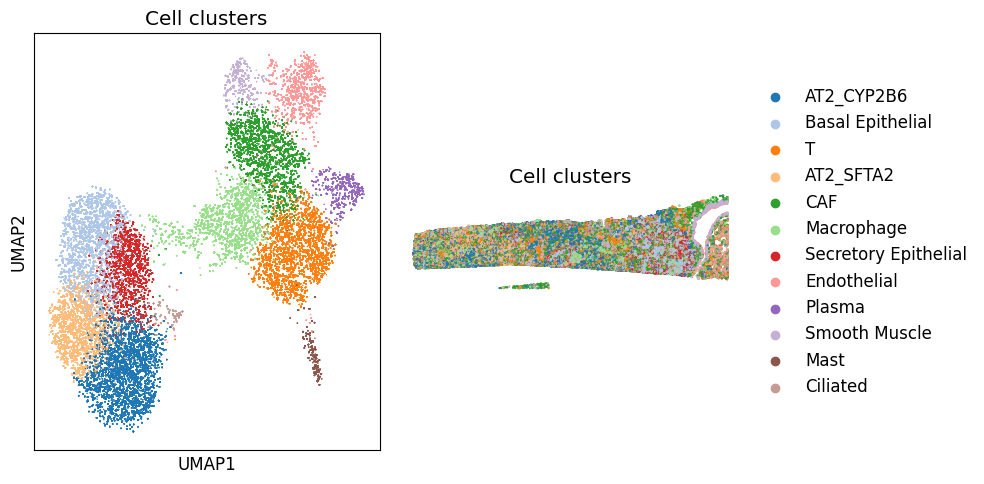

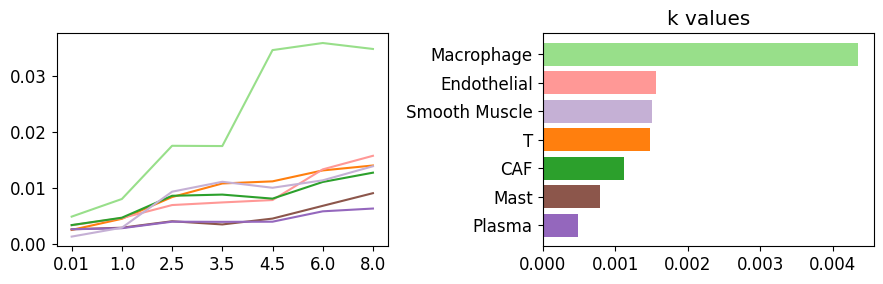

Suggested cluster:  Macrophage


In [4]:
subcluster_analyzer.calculate_metrics(nonepi=True)

Selected cluster: Macrophage


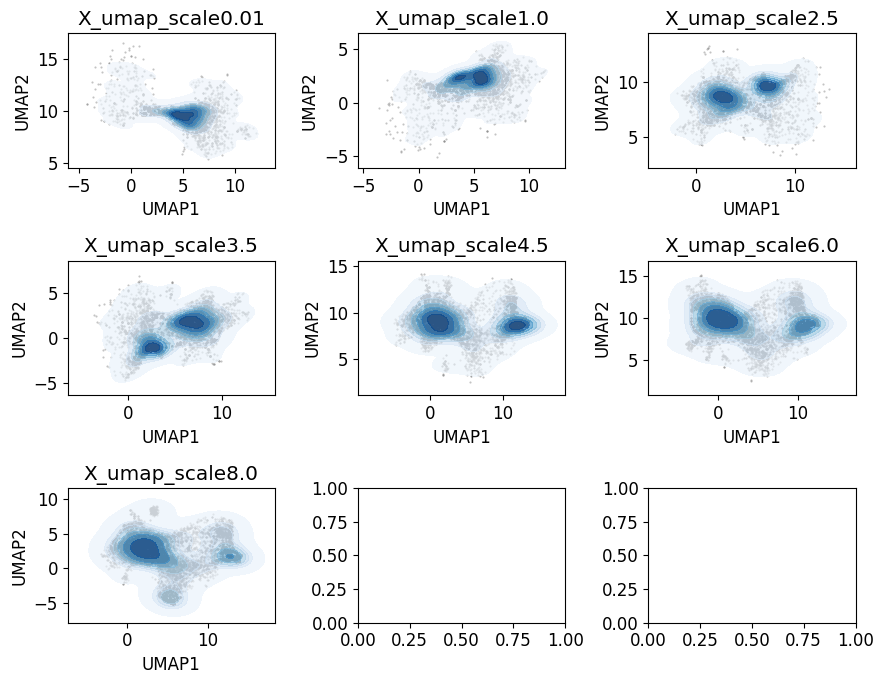

In [5]:
subcluster_analyzer.selected_cluster = "Macrophage"
subcluster_analyzer.kde_plot()

In [6]:
subcluster_analyzer.find_optimal_scale()

Optimal scale for cluster Macrophage is 4.5


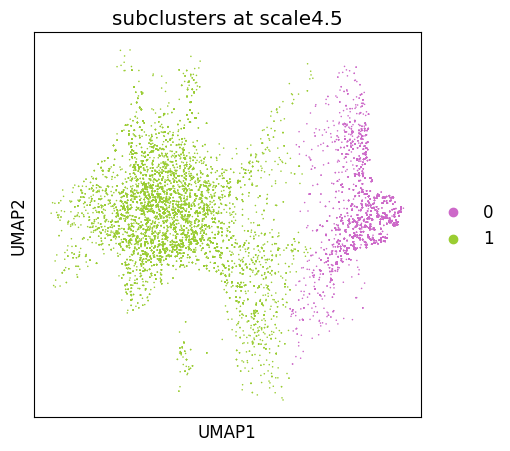

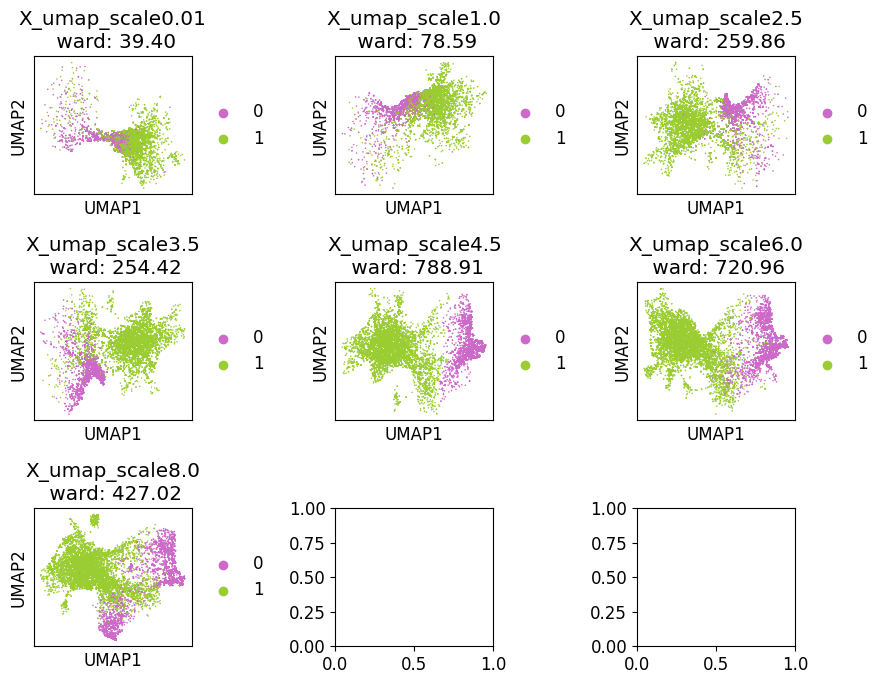

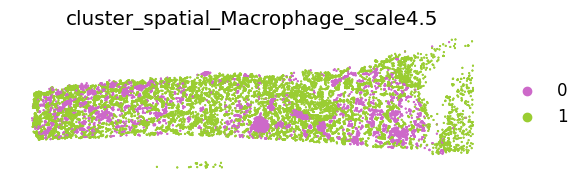

In [7]:
# # manually set the optimal scale here, if not, automatically set as the suggested one
# subcluster_analyzer.optimal_scale = 4.5
subcluster_analyzer.detect_subclusters(n_clusters=2, plot_all_scales=True, calculate_ward=True, plot_spatial=True)

## Differential analysis between subclusters

saving DEG results for subcluster 0
saving DEG results for subcluster 1


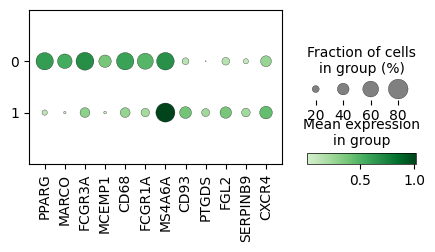

In [8]:
subcluster_analyzer.deg_analysis_subclusters(dotplot=True)

Saving cell type labels with subcluster labels...


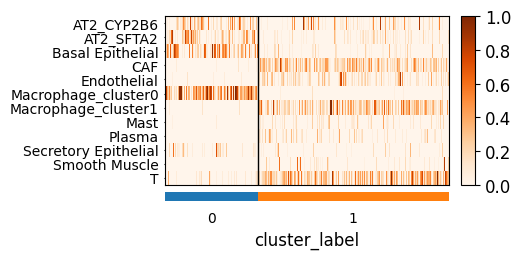

In [9]:
subcluster_analyzer.neighborhood_analysis(k=10)

In [11]:
# save processed h5ad files
subcluster_analyzer.ad.write(save_path + "ad_processed.h5ad")
subcluster_analyzer.ad_selected.write(save_path + "ad_selected.h5ad")
subcluster_analyzer.ad_selected_plot.write(save_path + "ad_selected_plot.h5ad")